# BUSINESS CASE: 

### Based on the given features predict the future flight  prices and plan their journey accordingly which will help the customers/passengers.

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:\\Users\\munal\\Downloads\\flight-fare (1)\\Flight_Fare.csv')

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## BASIC CHECKS:

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
data.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [9]:
data.shape

(10683, 11)

In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
# we have null values

# DOMAIN ANALYSIS:


1.	Airline: So this column will have all the types of airlines like;                         
        * IndiGo                               
        * Air India                            
        * Multiple carriers                    
        * SpiceJet                              
        * Vistara                               
        * Air Asia                              
        * GoAir                                 
        * Multiple carriers Premium economy      
        * Jet Airways Business                    
        * Vistara Premium economy                 
        * Trujet
    


2.	Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.
    


3.	Source: This column holds the name of the place from where the passenger’s journey will start like;
         * Delhi       
         * Kolkata     
         * Banglore    
         * Mumbai      
         * Chennai
    


4.	Destination: This column holds the name of the place to where passengers wanted to travel like;
         * Cochin       
         * Banglore     
         * Delhi        
         * New Delhi     
         * Hyderabad     
         * Kolkata
    


5.	Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their
    destination.
    


6.	Arrival_Time: Arrival time is when the passenger will reach his/her destination.
    


7.	Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.
    


8.	Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey such as,
        * 1 stop      
        * non-stop    
        * 2 stops     
        * 3 stops       
        * 4 stops  
    


9.	Additional_Info: In this column, we will get information about food, kind of food, and other amenities.
    


10.	Price: Price of the flight for a complete journey including all the expenses before onboarding.


#  EXPLORATORY DATA ANALYSIS

In [12]:
## Univariate Analysis
!pip install sweetviz    

In [13]:
import sweetviz as sv #importing sweetviz library 
my_report = sv.analyze(data)#syntax to use sweetviz
my_report.show_html() #Default arguments will generate to "SWEETVIZ_REPORT.html" this will show you in html page function

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


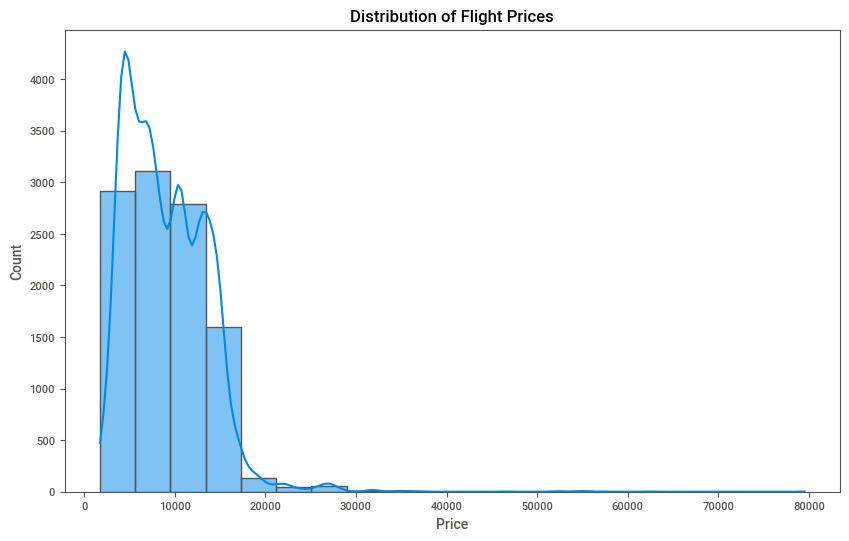

In [14]:

## Univariate Analysis
# 1. Price (Univariate)

plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=20, kde=True)
plt.xlabel('Price')
plt.title('Distribution of Flight Prices')
plt.show()


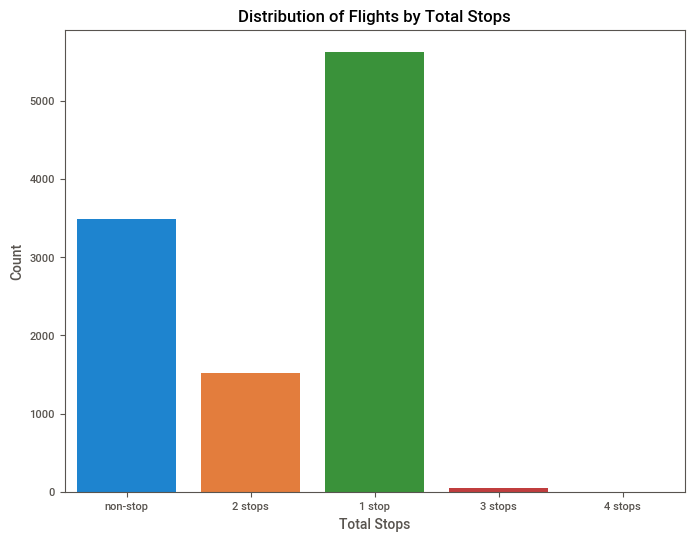

In [15]:
# 2. Total Stops (Univariate)
plt.figure(figsize=(8, 6))
sns.countplot(data['Total_Stops'])
plt.xlabel('Total Stops')
plt.ylabel('Count')
plt.title('Distribution of Flights by Total Stops')
plt.show()




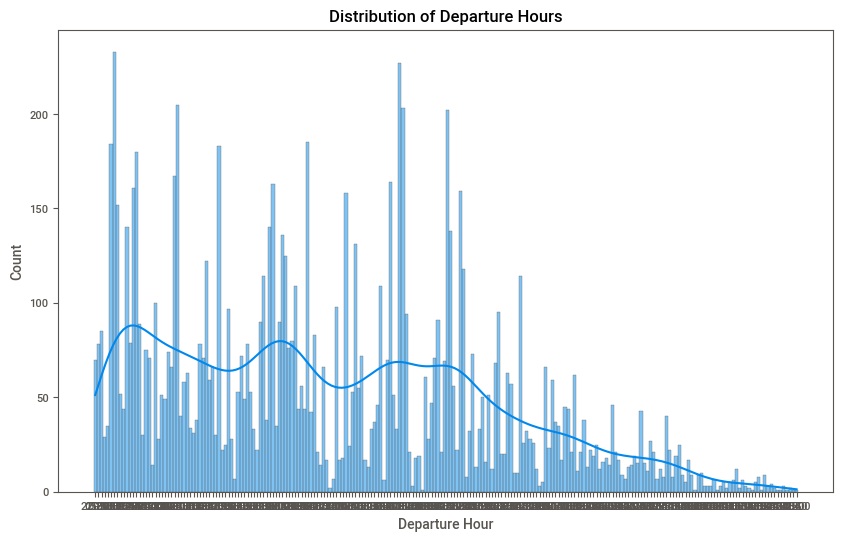

In [16]:
# 3. Departure Hour (Univariate)
plt.figure(figsize=(10, 6))
sns.histplot(data['Dep_Time'], bins=24,kde=True)
plt.xlabel('Departure Hour')
plt.title('Distribution of Departure Hours')
plt.show()




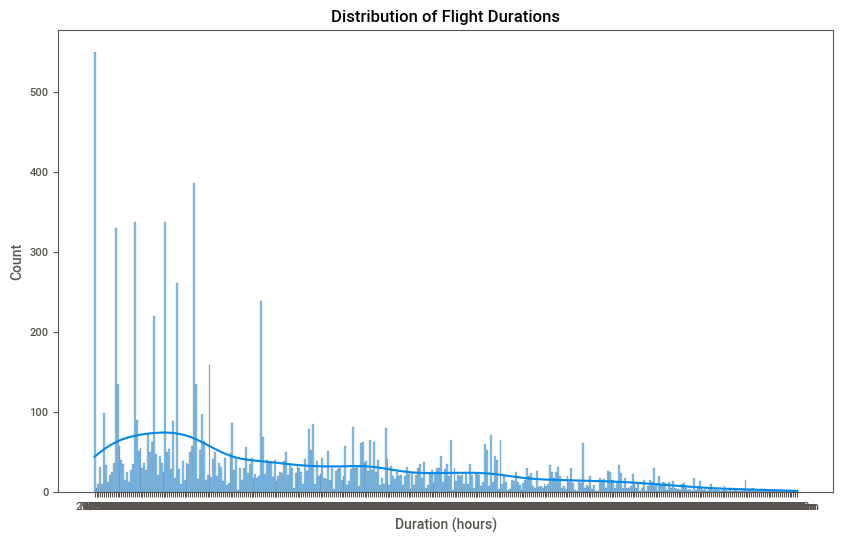

In [17]:
# 4. Duration (Univariate)
plt.figure(figsize=(10, 6))
sns.histplot(data['Duration'], bins=20, kde=True)
plt.xlabel('Duration (hours)')
plt.title('Distribution of Flight Durations')
plt.show()



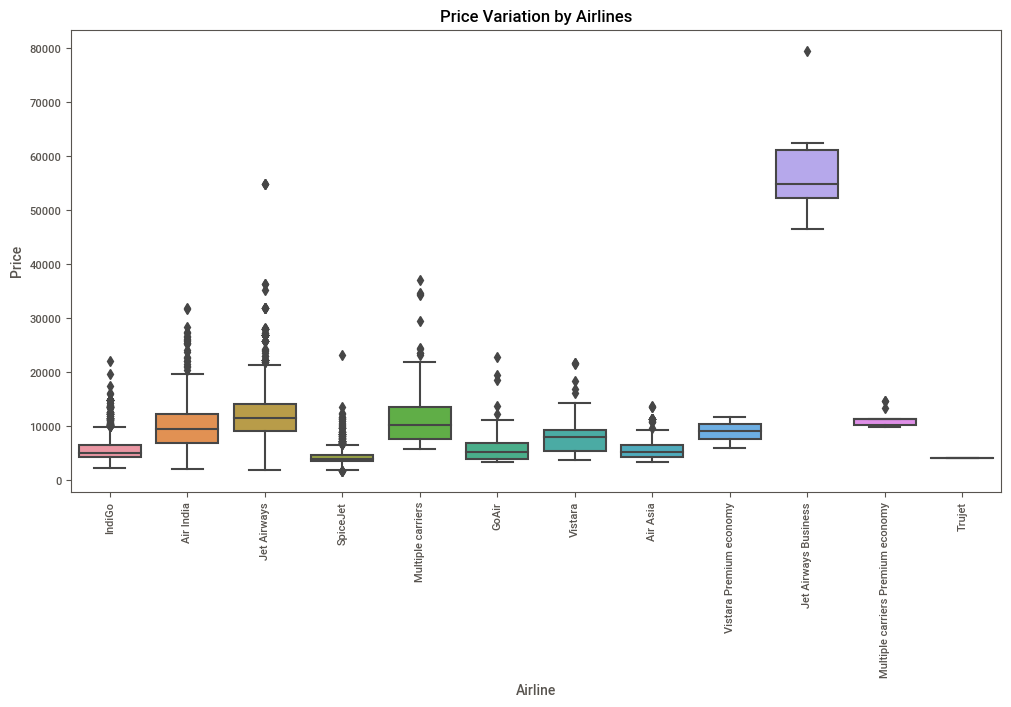

In [18]:
# Bivariate Analysis
# 1. Price vs. Airlines (Bivariate)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=data)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Price Variation by Airlines')
plt.xticks(rotation=90)
plt.show()



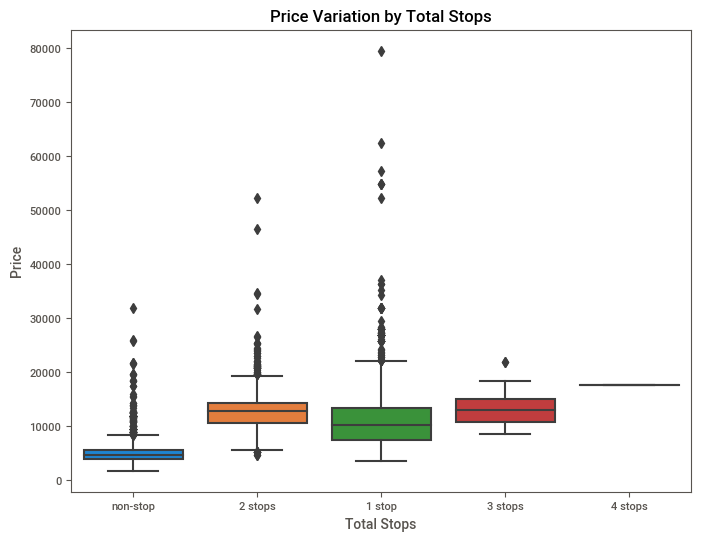

In [19]:

# 2. Price vs. Total Stops (Bivariate)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Total_Stops', y='Price', data=data)
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.title('Price Variation by Total Stops')
plt.show()

# Univariate Analysis:

1.Price (Univariate):

The distribution of flight prices is right-skewed, with a few flights having significantly higher prices than the majority.
Most flights fall into a relatively narrow price range, which can be considered the standard price for flights in the dataset.

2.Total Stops (Univariate):

The majority of flights have either 1 or 0 stops, indicating that non-stop and one-stop flights are the most common options.
Flights with two or more stops are less common.

3.Departure Hour (Univariate):

The distribution of departure hours shows two peaks, one in the early morning and another in the late evening.
This suggests that many flights depart during these hours.There is a drop in the number of flights during the afternoon.

4.Duration (Univariate):

The distribution of flight durations is right-skewed, with most flights having relatively short durations.
Longer-duration flights are less common, but there are still some in the dataset.

# Bivariate Analysis:

1.Price vs. Airlines (Bivariate):

Airline choice significantly influences ticket prices. Some airlines offer budget-friendly options, while others are more
premium.Passengers should consider their budget and preferences when selecting an airline.

2.Price vs. Total Stops (Bivariate):

Non-stop flights tend to be more expensive on average compared to one-stop or two-stop flights.
Travelers looking to save money may consider flights with stops, while those seeking convenience may opt for non-stop flights.

3.Price vs. Departure Hour (Bivariate):

Flight prices exhibit some variation based on the departure hour, with higher average prices during peak hours.
Passengers who are flexible with their travel times may find cost savings by selecting flights during off-peak hours.

4.Price vs. Duration (Bivariate):

There is a general trend of higher prices for longer-duration flights, but there is some variability.
Travelers should weigh the trade-off between flight cost and duration when making decisions.

5.Total Stops vs. Departure Hour (Bivariate):

The number of stops in flights varies by the time of departure. Non-stop flights are more common during peak hours.
Passengers seeking direct flights may want to travel during peak hours or choose their flights accordingly.

6.Total Stops vs. Duration (Bivariate):

Flights with more stops tend to have longer durations, which is expected.
Travelers should consider their preferences for stops and flight duration when planning their journeys.



# Conclusion:

*The flight dataset provides valuable insights into the airline domain. 
Travelers have various options to consider when planning their trips, including airline choice, the number of stops, 
departure times, and flight duration.

*Price is a crucial factor for travelers, and it varies significantly across airlines, 
based on the number of stops, and sometimes according to the departure time.

*Passengers should carefully evaluate their priorities, such as cost, convenience, and travel time, when making flight choices.

*Airlines can use this analysis to understand market dynamics and traveler preferences to optimize their pricing strategies
and service offerings.

*The dataset provides a foundation for further analysis, such as predictive modeling for flight prices, demand forecasting,
and optimization of flight schedules.

*Travelers, airlines, and industry analysts can use these insights to make informed decisions and enhance the overall
travel experience

# Data Preprocessing

In [20]:
## Getting the rows where values are missed in total_stops feature:
data.loc[data['Total_Stops'].isnull()==True]   

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [21]:
## Checking the distribution along the labels
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [22]:
#dropping those missing values:
data.dropna(inplace=True)

In [23]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [24]:
# NO-NULL VALUES

## Feature Encoding:

### Conversion of  Categorical columns into Numerical columns

In [25]:
data['Journey_date']=pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.day
data['Journey_month']=pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.month

In [26]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [27]:
data['Dep_Hour']=pd.to_datetime(data.Dep_Time).dt.hour
data['Dep_Min']=pd.to_datetime(data.Dep_Time).dt.minute
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Hour,Dep_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [28]:
data['Arrival_Hour']=pd.to_datetime(data.Arrival_Time).dt.hour
data['Arrival_,Minute']=pd.to_datetime(data.Arrival_Time).dt.minute
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,"Arrival_,Minute"
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [29]:
data.drop(columns=['Arrival_Time','Dep_Time','Date_of_Journey'],inplace=True)

In [30]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,"Arrival_,Minute"
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [31]:
# Sample duration data
duration = list(data.Duration)

# Initialize lists to store hours and minutes
duration_hour = []
duration_minute = []

# Extract hours and minutes from each duration
for d in duration:
    hours, minutes = 0, 0  # Initialize to 0 in case 'h' or 'm' is missing
    if 'h' in d:
        hours = int(d.split('h')[0])
    if 'm' in d:
        minutes = int(d.split()[-1].split('m')[0])
    duration_hour.append(hours)
    duration_minute.append(minutes)

print("Duration Hours:", duration_hour)
print("Duration Minutes:", duration_minute)

Duration Hours: [2, 7, 19, 5, 4, 2, 15, 21, 25, 7, 13, 2, 2, 12, 2, 26, 4, 22, 23, 20, 5, 15, 2, 2, 13, 15, 5, 5, 2, 2, 2, 13, 2, 22, 5, 10, 5, 2, 6, 11, 11, 8, 22, 2, 12, 2, 2, 2, 16, 19, 3, 25, 2, 3, 2, 16, 15, 2, 6, 25, 12, 27, 10, 10, 2, 10, 2, 1, 13, 2, 1, 26, 7, 13, 5, 2, 2, 1, 19, 2, 14, 2, 22, 9, 10, 21, 5, 18, 12, 18, 9, 11, 17, 13, 2, 2, 2, 3, 1, 16, 12, 12, 7, 24, 2, 8, 7, 14, 30, 19, 15, 2, 12, 10, 5, 15, 16, 10, 2, 11, 2, 1, 14, 20, 2, 23, 18, 16, 2, 2, 8, 16, 3, 2, 14, 23, 21, 21, 2, 10, 8, 8, 5, 8, 11, 27, 8, 20, 4, 8, 2, 24, 2, 12, 12, 23, 16, 2, 25, 26, 28, 2, 25, 9, 4, 15, 1, 2, 9, 2, 22, 3, 11, 9, 12, 17, 5, 25, 20, 13, 18, 1, 9, 16, 2, 4, 5, 24, 2, 2, 4, 25, 6, 3, 18, 2, 12, 19, 2, 8, 9, 2, 3, 2, 12, 2, 9, 2, 9, 29, 2, 5, 9, 10, 4, 1, 11, 2, 2, 10, 2, 10, 1, 9, 22, 28, 37, 2, 1, 1, 25, 2, 6, 17, 5, 2, 25, 13, 2, 10, 8, 5, 12, 2, 2, 2, 9, 10, 2, 4, 3, 23, 27, 12, 24, 1, 2, 3, 11, 13, 2, 2, 2, 11, 14, 13, 14, 15, 2, 15, 12, 9, 12, 7, 27, 1, 1, 5, 11, 3, 24, 27, 2, 17,

In [32]:
data['Duration_hour']=duration_hour
data['Duration_minute']=duration_minute

In [33]:
data.drop(columns='Duration',inplace=True)

In [34]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,"Arrival_,Minute",Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [35]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [36]:
Airline = data[['Airline']]
current_airline_list = Airline['Airline']
new_airline_list = []


for carrier in current_airline_list:
    if carrier in ['Jet Airways','Multiple carriers','IndiGo','Air India',
                     'SpiceJet','Vistara','Air Asia','GoAir']:                                                   
        new_airline_list.append(carrier)
    else:
        new_airline_list.append('other')
    
        
Airline['Airline']=pd.DataFrame(new_airline_list)
Airline['Airline'].value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1750
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
other                  23
Name: Airline, dtype: int64

In [37]:
Airline = pd.get_dummies(Airline,drop_first=True)

In [38]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_other
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [39]:
data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [40]:
Source = data[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)

In [41]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [42]:
data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [43]:
Destination = data[['Destination']]
current_Destination_list =Destination['Destination']
new_Destination_list = []


for value in current_Destination_list:
    if value in ['New Delhi']:                                                   
        new_Destination_list.append('Delhi')
    else:
        new_Destination_list.append(value)
    
        
Destination['Destination']=pd.DataFrame(new_Destination_list)
Destination['Destination'].value_counts()

Cochin       4535
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [44]:
Destination = pd.get_dummies(Destination,drop_first=True)

In [45]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [46]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [47]:
# manual encoding:
data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace = True)

In [48]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,"Arrival_,Minute",Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [49]:
data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [50]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,"Arrival_,Minute",Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [51]:
data.shape

(10682, 13)

In [52]:
flight = pd.concat([data,Airline,Source,Destination], axis=1)

In [53]:
#dropping unwanted features:
flight.drop(['Airline','Source','Destination'], axis=1, inplace=True)

In [54]:
flight.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,"Arrival_,Minute",Duration_hour,Duration_minute,...,Airline_Vistara,Airline_other,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


In [55]:
flight.shape

(10682, 26)

# Feature Selection:

<AxesSubplot:>

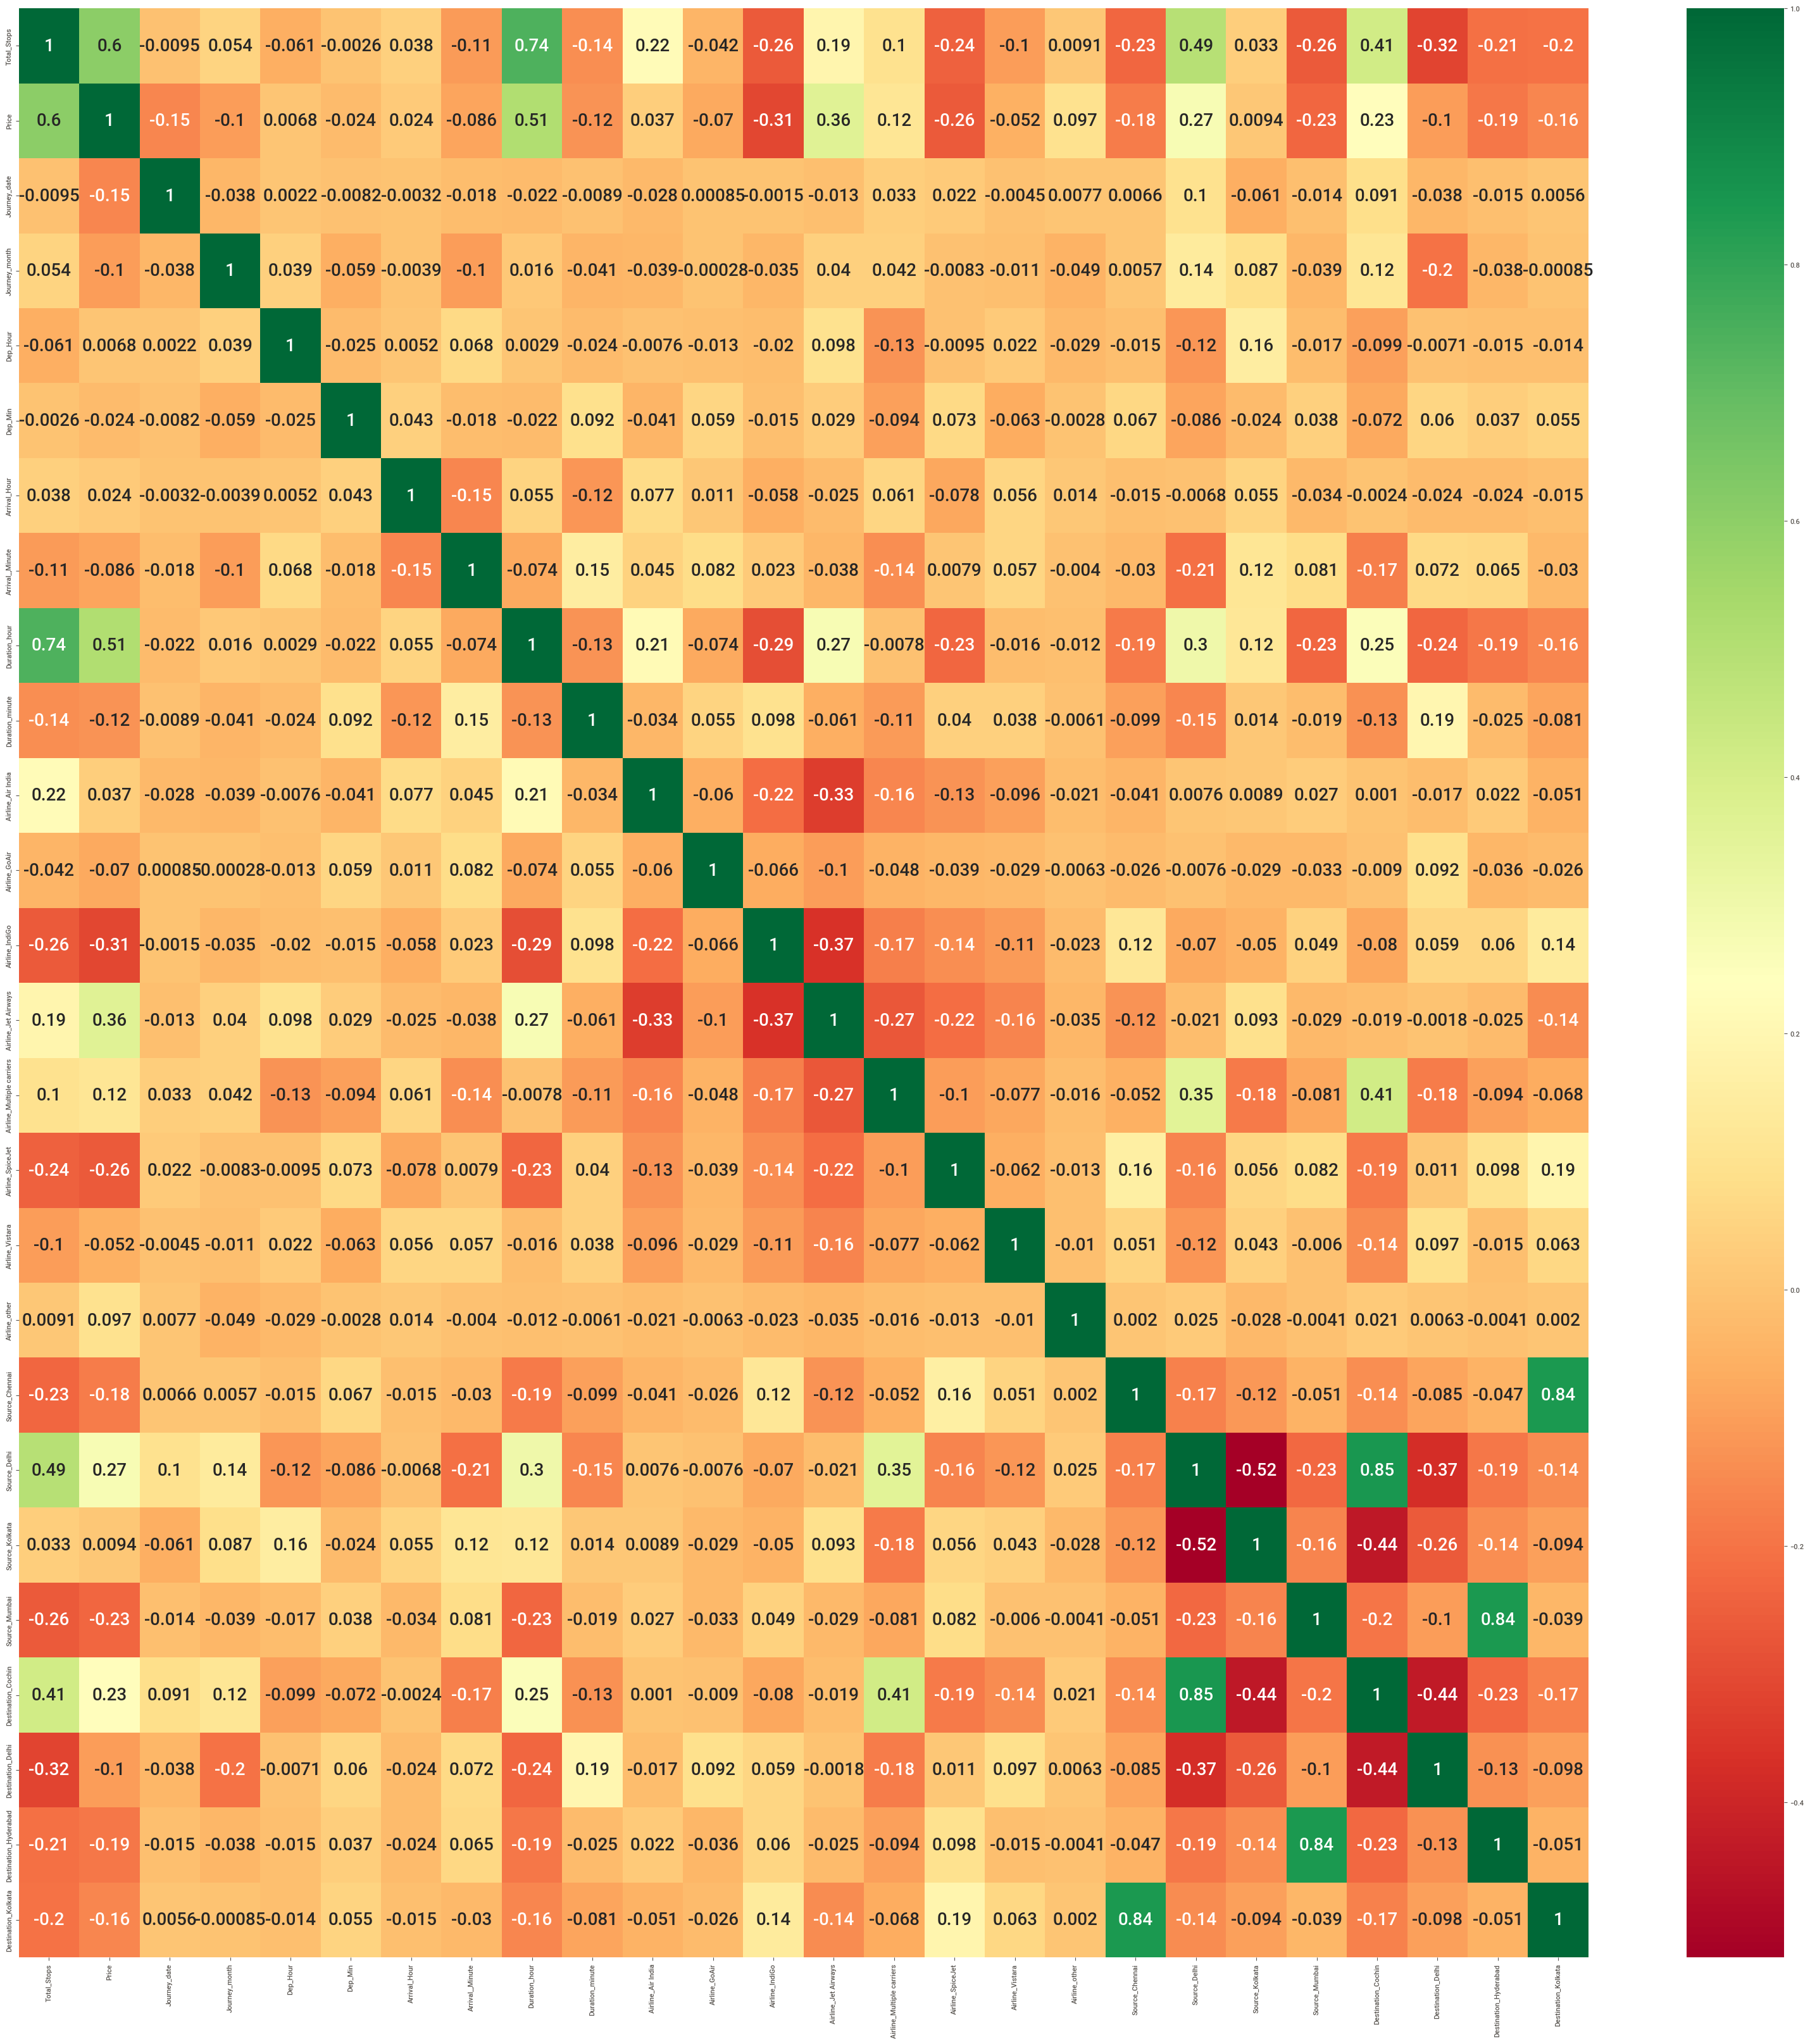

In [56]:
## Checking correlation

plt.figure(figsize=(40, 40))#canvas size
sns.heatmap(flight.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":20})#plotting heat map to check correlation

In [57]:
## Creating independent and dependent variable
X = flight.drop('Price', axis=1)#independent variable 
Y = flight.Price#dependent variable 

In [58]:
# checking feature importance:
from sklearn.ensemble import ExtraTreesRegressor
feature_imp = ExtraTreesRegressor()
feature_imp.fit(X,Y)

print(feature_imp.feature_importances_)

[0.24802225 0.13862058 0.06878302 0.03039738 0.0272441  0.03566523
 0.02579533 0.14137831 0.02194166 0.00729329 0.00202748 0.01058394
 0.10017387 0.01485672 0.00388707 0.00514397 0.02531096 0.001017
 0.02447648 0.01136832 0.0161033  0.00815935 0.02586388 0.00347966
 0.00240683]


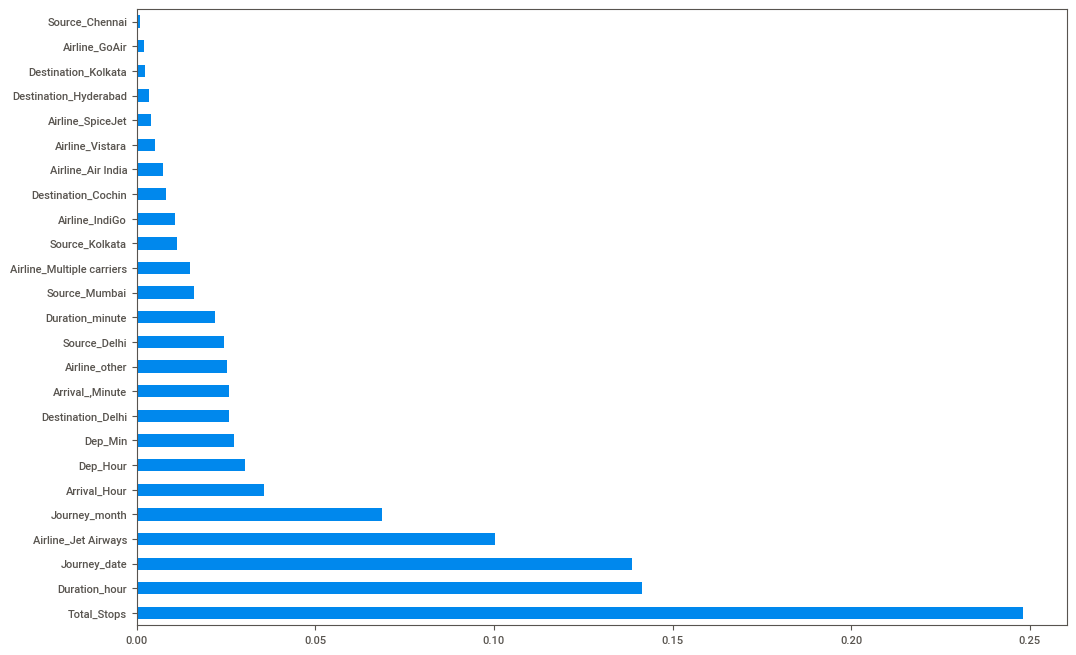

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 8))
feat_importances = pd.Series(feature_imp.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()


In [60]:
#checking for multicollinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    #calculating var infla factor
    vif=pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"]= [variance_inflation_factor(z.values,i) for i in range(z.shape[1])]
    return (vif)

In [61]:
calc_vif(X)     #vif VALUE>10 IS GENERALLY A SIGN OF MULTICOLLINEARITY

,variables,VIF
0,Total_Stops,7.483614
1,Journey_date,3.509757
2,Journey_month,16.058719
3,Dep_Hour,5.755551
4,Dep_Min,2.777481
5,Arrival_Hour,4.887929
6,"Arrival_,Minute",3.429245
7,Duration_hour,6.085587
8,Duration_minute,4.067779
9,Airline_Air India,5.004881


In [62]:
# to get all the column names:
column_names = flight.columns
print(column_names)


Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_,Minute', 'Duration_hour',
       'Duration_minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_SpiceJet', 'Airline_Vistara', 'Airline_other',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')


In [63]:
#dropping less correlated feature  (source_delhi):
X = flight.loc[:, ['Total_Stops', 'Journey_date', 'Journey_month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_,Minute', 'Duration_hour',
       'Duration_minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_SpiceJet', 'Airline_Vistara', 'Airline_other',
       'Source_Chennai',  'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata']]
    
X.head()

,Total_Stops,Journey_date,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,"Arrival_,Minute",Duration_hour,Duration_minute,Airline_Air India,...,Airline_SpiceJet,Airline_Vistara,Airline_other,Source_Chennai,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# MODEL CREATION:

## RANDOM FOREST

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [66]:
from sklearn.ensemble import RandomForestRegressor#importing randomforest

rf_clf = RandomForestRegressor(n_estimators=500)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data


RandomForestRegressor(n_estimators=500)

In [67]:
print("model performance on training set:", round(rf_clf.score(X_train,y_train)*100,2))
print("model performance on testing set:", round(rf_clf.score(X_test,y_test)*100,2))

model performance on training set: 95.43
model performance on testing set: 76.05


In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test and y_predict are your actual and predicted regression target values
y_predict=rf_clf.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_predict))
print("Mean Squared Error:", mean_squared_error(y_test, y_predict))
print("Root Mean Squared Error:",mean_squared_error(y_test, y_predict, squared=False)) 
      # Calculate RMSE by setting squared=False
print("R-squared:",  r2_score(y_test, y_predict))
print("Normalized rmse", round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)) / (max(y_test) - min(y_test)), 2))



Mean Absolute Error: 1302.2178673393807
Mean Squared Error: 5163865.36752347
Root Mean Squared Error: 2272.4139956274407
R-squared: 0.7605114609715122
Normalized rmse 0.04


In [69]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.76)*(2671-1)/(2671-24-1)
adjusted_r2

0.7578231292517007

## DECISION TREE:

In [70]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor
dt_reg = DecisionTreeRegressor(criterion='mse', max_depth=10, min_samples_leaf=1, min_samples_split=3, splitter='random')

# Fit the model to your training data (X_sm and y_sm)
dt_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_reg.predict(X_test)
y_pred

# y_pred now contains the predicted values for regression


array([16567.        ,  8670.20614035,  8670.20614035, ...,
        9175.83448276, 11697.17763158, 12461.90950226])

In [71]:
y_train_predict=dt_reg.predict(X_train)#passing X_train to predict Y_train

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",mean_squared_error(y_test, y_pred, squared=False)) 
      # Calculate RMSE by setting squared=False
print("R-squared:",  r2_score(y_test, y_pred))
print("Normalized rmse", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)) / (max(y_test) - min(y_test)), 2))



Mean Absolute Error: 1549.9044624591268
Mean Squared Error: 7196347.349257062
Root Mean Squared Error: 2682.6008553746983
R-squared: 0.6662494874761525
Normalized rmse 0.05


## BAGGING TECHNIQUE FOR DECISION TREE

In [73]:
from sklearn.ensemble import BaggingRegressor




# Create a BaggingRegressor with the base estimator
bagged_regressor = BaggingRegressor(base_estimator=dt_reg, n_estimators=300, random_state=42)

# Fit the BaggingRegressor to your training data
bagged_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagged_regressor.predict(X_test)


In [74]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 1456.269648269472
Mean Squared Error: 5471073.700688503
Root Mean Squared Error: 2339.0326420741767
R-squared: 0.7462638248209293


In [75]:
r2

0.7462638248209293

## GRADIENT BOOSTING REGRESSOR:

In [76]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price

In [77]:
## evaluating the model
from sklearn.metrics import r2_score # to check model performance
r2_score(y_test,y_gbm)#checking r2score

0.6715310151311094

In [78]:
y_pr_tra = gbm.predict(X_train)

In [79]:
r2_score(y_train,y_pr_tra)

0.7527953217196087

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error:", mean_absolute_error(y_test, y_gbm))
print("Mean Squared Error:", mean_squared_error(y_test, y_gbm))
print("Root Mean Squared Error:",mean_squared_error(y_test, y_gbm, squared=False)) 
      # Calculate RMSE by setting squared=False
print("R-squared:",  r2_score(y_test, y_gbm))
print("Normalized rmse", round(np.sqrt(metrics.mean_squared_error(y_test, y_gbm)) / (max(y_test) - min(y_test)), 2))



Mean Absolute Error: 1682.3905186570241
Mean Squared Error: 7082466.7524832655
Root Mean Squared Error: 2661.2904299386914
R-squared: 0.6715310151311094
Normalized rmse 0.05


## XGB BOOST REGRESSOR:

In [81]:
## Installing XGB library

!pip install xgboost

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8545 entries, 10005 to 7270
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Total_Stops                8545 non-null   int64
 1   Journey_date               8545 non-null   int64
 2   Journey_month              8545 non-null   int64
 3   Dep_Hour                   8545 non-null   int64
 4   Dep_Min                    8545 non-null   int64
 5   Arrival_Hour               8545 non-null   int64
 6   Arrival_,Minute            8545 non-null   int64
 7   Duration_hour              8545 non-null   int64
 8   Duration_minute            8545 non-null   int64
 9   Airline_Air India          8545 non-null   uint8
 10  Airline_GoAir              8545 non-null   uint8
 11  Airline_IndiGo             8545 non-null   uint8
 12  Airline_Jet Airways        8545 non-null   uint8
 13  Airline_Multiple carriers  8545 non-null   uint8
 14  Airline_SpiceJet    

In [83]:
## model creation
#importing the model library
from xgboost import XGBRegressor

xgb_r= XGBRegressor() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price

In [84]:
r2_score(y_test,y_hat)#R2 score

0.7933718739363322

### Hyper parameter tunning in XG boost:

In [85]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)] # no. of models 
max_depth = [3,4,5,6]#The maximum depth of a tree
learning_rate=[0.1,0.2,0.3] #Typical final values to be used: 0.01-0.3
gamma=[0, 1, 2, 3, 4] # Gamma specifies the minimum loss reduction required to make a split. It controls the overfitting. 
                      # Ranges from 0 to ∞.
subsample=[0.5,0.7,1] # no of samples to be used. For eg: 0.5 -> half of the training data (50%) used to train each tree.
                     #Lower values make the algorithm more conservative and prevents overfitting but too 
                     #small values might lead to under-fitting.Typical values: 0.5-1. Range: (0,1)
colsample_bytree=[0.5,0.7,1]#Denotes the fraction of columns to be randomly samples for each tree. Ranges from 0 to 1
                          # ie., % of features should be taken for each tree

params={
    'max_depth':max_depth,'learning_rate':learning_rate,'n_estimators':n_estimators,
     'gamma':gamma, 'subsample':subsample, 'colsample_bytree':colsample_bytree
}

XGB=XGBRegressor(random_state=42)

rcv= RandomizedSearchCV(XGB, scoring='r2',param_distributions=params, n_iter=100, cv=3, 
                                random_state=42, n_jobs=-1)
                              
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of folds
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train, y_train) ##training data on randomsearch cv.
cv_best_params = rcv.best_params_ ##it will give you best parameters 
print(f"Best paramters: {cv_best_params}")  ##printing  best parameters

Best paramters: {'subsample': 0.7, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [86]:
cv_best_params

{'subsample': 0.7,
 'n_estimators': 400,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.7}

In [87]:
XGB2=XGBRegressor(subsample= 1,
 n_estimators= 200,
 max_depth= 6,
 learning_rate= 0.2, gamma=1,
 colsample_bytree= 0.7)

XGB2.fit(X_train, y_train)#training 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [88]:
y_predict=XGB2.predict(X_test)#testing

In [89]:
r2_score2=r2_score(y_test,y_predict)#checking performance
r2_score2

0.7973781418633259

In [90]:
X_test.shape

(2137, 24)

## LINEAR REGRESSION:

In [91]:
# Step 3 Creating model
from sklearn.linear_model import LinearRegression

LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression
y_predict=LR.predict(X_test)

In [92]:
y_pre_train = LR.predict(X_train)

In [93]:
y_train # actual output
y_pre_train # predicted output

array([ 7570.46063292, 11834.86550816,  6959.38338924, ...,
       10470.23611578,  6440.9460804 , 11832.08811406])

In [94]:
# Step 4 Model Evalution
 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)
r2score

0.5023760683372586

In [95]:
X_test.shape

(2137, 24)

In [96]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.50)*(2137-1)/(21373-24-1)
adjusted_r2

0.9499718943226532

## K-NEIGHBHORS REGRESSOR

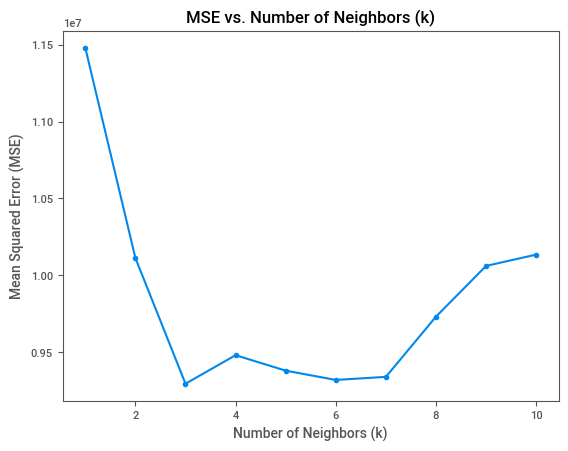

In [100]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

# Create a list to store the mean squared error (MSE) for each k
mse_values = []

# Define a range of k values to test
k_values = range(1, 11)

# Iterate through each k value
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
    mse_values.append(mse)

# Plot the MSE values for each k
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Neighbors (k)')
plt.show()

In [101]:
# let's fit the data into KNN model and see how well it performs:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train,y_train)# Predict 
y_pred = knn_regressor.predict(X_test)

In [102]:
# Step 4 Model Evalution

r2score=r2_score(y_test,y_pred)
r2score

0.5689364552719969

# TRAINING AND TESTING SCORES:
## A Conclusion from the achieved scores:

1.Random Forest:

-->Testing Score: 76.26%
-->Training Score: 95.41%
Random Forest is performing well on the testing data with a reasonably high R-squared value, indicating a good fit to the data.
 However, the difference between the training and testing scores suggests some degree of overfitting, which should be addressed.

2.Decision Tree (Dtree):

-->Testing Score: 0.61%
Decision Tree has a low R-squared value on the testing data, indicating that it doesn't fit the data well. This suggests that 
the model may be too simplistic for the task.

3.Bagging for Decision Tree:

-->Testing Score: 0.74%
Bagging, which combines multiple decision trees, has improved the performance compared to the individual decision tree. However, the R-squared value is still relatively low, suggesting room for further improvement.

4.Gradient Boosting Regressor:

-->Testing Score: 0.67%
-->Training Score: 0.75%
Gradient Boosting Regressor has a moderate R-squared value on the testing data, indicating a reasonable fit. The model shows
some overfitting as the training score is higher.

5.XGBoost Regressor:

-->Testing Score: 0.78% (after hyperparameter tuning)
XGBoost Regressor has a good R-squared value on the testing data, even higher after hyperparameter tuning. It shows promise as 
a strong performer for the regression task.

6.Linear Regression:

-->Testing Score: 0.50%
-->Adjusted R-squared: 0.94
Linear regression is not fitting the data well, as indicated by the low R-squared value. However, the high adjusted R-squared 
value suggests that the model might have too many features or other issues leading to poor model fit.

7.K-Nearest Neighbors (KNN):

-->Testing R-squared: 0.56%
KNN has a moderate R-squared value on the testing data. It seems to perform better than simple linear regression but may still 
have room for improvement.

## Conclusion:

* With the greatest R-squared values on the test data, the best-performing models are Random Forest, XGBoost Regressor, and 
Bagging for Decision Tree. Hyperparameter-tuned XGBoost Regressor stands out among them as the top performer.


* Low R-squared values for Decision Tree and Linear Regression on the testing data show poor model fit. For these models to 
perform better, further feature engineering or more difficult methods may be required.


* Although the performance of the Gradient Boosting Regressor and K-Nearest Neighbors is acceptable, more hyperparameter 
adjustment or feature selection may be advantageous.


* It is crucial to take overfitting into account and make sure that models generalize effectively to fresh, untested data.